# **Paso 1: Importación de librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# **Paso 2: Cargar el dataset en memoria**
Asegurar de subir el archivo sales.csv a tu entorno de Colab antes de correr esto

In [ ]:
df = pd.read_csv('pbg_porsectores_itrim2004_a_iiitrim2022.csv', sep=',')

df.head()


,anio,trimestre,periodo,letra,letra_desc,tipo,valor
0,2004,I,2004-I,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,927599.0
1,2004,II,2004-II,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,881717.0
2,2004,III,2004-III,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,829281.0
3,2004,IV,2004-IV,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,769662.0
4,2005,I,2005-I,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,702145.0


# Análisis Exploratorio de Datos (EDA): Actividad Económica en Chaco (2004-2022)

Este notebook presenta un Análisis Exploratorio de Datos (EDA) sobre la evolución y las características de las principales actividades económicas en la provincia del Chaco, Argentina, abarcando el período de 2004 a 2022. El objetivo es identificar tendencias, patrones de distribución y relaciones entre distintos sectores, proporcionando una visión integral del dinamismo económico de la provincia.

Para ello, se utilizarán diversas herramientas de visualización como mapas de calor, gráficos de áreas apiladas, diagramas de violín y box plots, que permitirán comprender la participación porcentual, la dispersión de valores y la presencia de comportamientos atípicos en los datos. Este análisis es fundamental para fundamentar futuras decisiones o investigaciones sobre el desarrollo económico regional.

Fuenta: https://datosabiertos.chaco.gob.ar/dataset/bdb8044f-35e6-40d6-9bec-d161ecac209e/resource/15444ec2-e721-4062-be5f-b75d37db8178/download/pbg_porsectores_itrim2004_a_iiitrim2022.csv

# **Paso 3: Exploración inicial del dataframe**

In [ ]:
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,anio,trimestre,periodo,letra,letra_desc,tipo,valor
0,2004,I,2004-I,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,927599.0
1,2004,II,2004-II,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,881717.0
2,2004,III,2004-III,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,829281.0
3,2004,IV,2004-IV,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,769662.0
4,2005,I,2005-I,A,"Agricultura, ganadería, caza y silvicultura",Precios Corrientes,702145.0


In [ ]:
print("\nÚltimas 5 filas del dataset:")
df.tail()


Últimas 5 filas del dataset:


,anio,trimestre,periodo,letra,letra_desc,tipo,valor
2395,2021,III,2021-III,P,Hogares privados con servicio doméstico,Precios Constantes,55317.0125
2396,2021,IV,2021-IV,P,Hogares privados con servicio doméstico,Precios Constantes,55375.3945
2397,2022,I,2022-I,P,Hogares privados con servicio doméstico,Precios Constantes,51482.7898
2398,2022,II,2022-II,P,Hogares privados con servicio doméstico,Precios Constantes,52132.5260
2399,2022,III,2022-III,P,Hogares privados con servicio doméstico,Precios Constantes,52606.1172


In [ ]:
print("\nDimensión del DataFrame (filas, columnas):")
df.shape


Dimensión del DataFrame (filas, columnas):


(2400, 7)

In [ ]:
print("Años contenidos en la tabla:")
print(df['anio'].unique())

Años contenidos en la tabla:
[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [ ]:
print("\nNombres de columnas:")
df.columns


Nombres de columnas:


Index(['anio', 'trimestre', 'periodo', 'letra', 'letra_desc', 'tipo', 'valor'], dtype='object')

In [ ]:
print("\nTipo de datos por columna:")
df.dtypes


Tipo de datos por columna:


,0
anio,int64
trimestre,object
periodo,object
letra,object
letra_desc,object
tipo,object
valor,float64


# **Paso 4: Resumen estadístico de columnas numéricas**

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)# Configura las opciones de visualización de Pandas
df.describe()

,anio,valor
count,2400.00,2400.00
mean,2012.88,5096580.76
std,5.41,18109346.84
min,2004.00,50.95
25%,2008.00,186930.75
50%,2013.00,671839.47
75%,2018.00,1719237.59
max,2022.00,262489753.50


*Cuando intento realizar el resumen estadístico solamente en la comuna valor que hace a la importancia de los datos , el .describe() genera una error.


In [ ]:
df.describe("valor")

TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'

*Buscando un dato que no sea número en la columna "valor"


In [ ]:
# Convertir la columna 'valor' a tipo numérico, forzando errores a NaN
# Esto es crucial para manejar cualquier valor no numérico que pueda estar oculto
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# Verificar si hay valores NaN después de la conversión
# Si hay, significa que se encontraron valores no numéricos y se convirtieron a NaN
if df['valor'].isnull().sum() > 0:
    print(f"Advertencia: Se encontraron y convirtieron a NaN {df['valor'].isnull().sum()} valores no numéricos en 'valor'.")
    # inspeccionar las filas que ahora tienen NaN si quieres
print(df[df['valor'].isnull()])

df['valor'].describe()

Empty DataFrame
Columns: [anio, trimestre, periodo, letra, letra_desc, tipo, valor]
Index: []


,valor
count,2400.00
mean,5096580.76
std,18109346.84
min,50.95
25%,186930.75
50%,671839.47
75%,1719237.59
max,262489753.50


# **Paso 5: Información general (tipos, nulos, memoria)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anio        2400 non-null   int64  
 1   trimestre   2400 non-null   object 
 2   periodo     2400 non-null   object 
 3   letra       2400 non-null   object 
 4   letra_desc  2400 non-null   object 
 5   tipo        2400 non-null   object 
 6   valor       2400 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 131.4+ KB


# **Paso 6: Ver cuantos valores nulos hay por columna**

In [ ]:
df.isnull().sum()

,0
anio,0
trimestre,0
periodo,0
letra,0
letra_desc,0
tipo,0
valor,0


# **Paso 7: Verificar y eliminar filas duplicadas**

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# **Paso 8: Eliminar columnas innecesarias**

In [ ]:
df.drop(['letra', 'tipo'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anio        2400 non-null   int64  
 1   trimestre   2400 non-null   object 
 2   periodo     2400 non-null   object 
 3   letra_desc  2400 non-null   object 
 4   valor       2400 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 93.9+ KB


In [ ]:
df.head()

,anio,trimestre,periodo,letra_desc,valor
0,2004,I,2004-I,"Agricultura, ganadería, caza y silvicultura",927599.00
1,2004,II,2004-II,"Agricultura, ganadería, caza y silvicultura",881717.00
2,2004,III,2004-III,"Agricultura, ganadería, caza y silvicultura",829281.00
3,2004,IV,2004-IV,"Agricultura, ganadería, caza y silvicultura",769662.00
4,2005,I,2005-I,"Agricultura, ganadería, caza y silvicultura",702145.00


## **VISUALIZACIÓN**

# *1. Queremos ver la evolución en el tiempo del producto bruto total de la Provincia del Chaco para centrar el analisis en los años mas significativos y desde allí avanzar con una mayor segmentación*.
  >  ***Se visualiza en los siguientes dos gráficos un gran crecimiento del PBT desde 2013 en adelante, por este motido se acotara el análisis a los útimos 10 años.***.


A- Scatter Plot

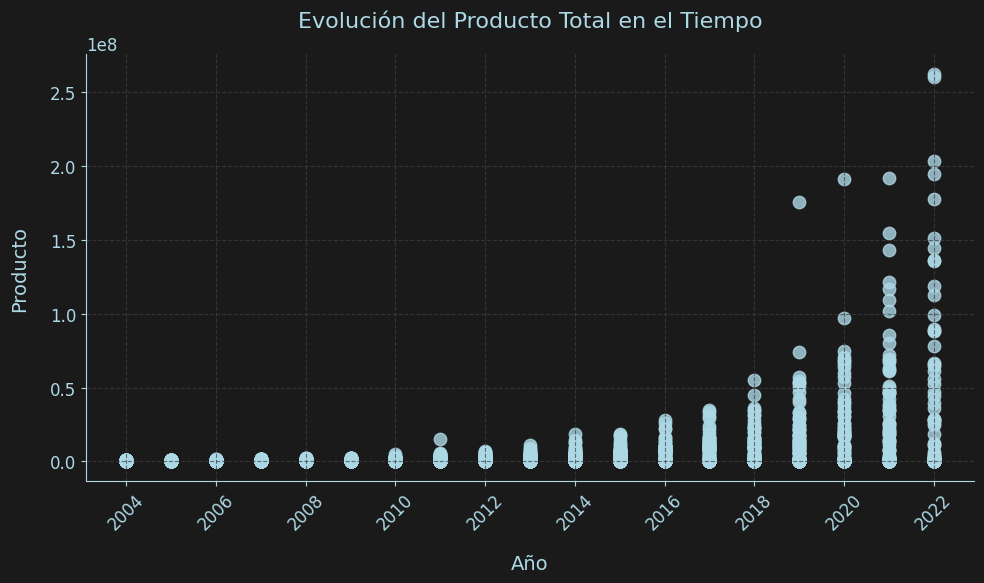

In [ ]:
# --- Configuración del estilo para fondo oscuro y texto claro ---

fondo_negro = '#1a1a1a' # Un negro muy oscuro
color_texto = '#ADD8E6' # Turquesa claro (lightskyblue), o puedes usar '#FFFFFF' para blanco puro
color_grid = '#404040' # Gris oscuro para la cuadrícula

# Configurar el estilo general de matplotlib
plt.style.use('dark_background') # Un estilo base oscuro de matplotlib

# Aplicar colores específicos para un mayor control
plt.rcParams['figure.facecolor'] = fondo_negro
plt.rcParams['axes.facecolor'] = fondo_negro
plt.rcParams['text.color'] = color_texto
plt.rcParams['xtick.color'] = color_texto
plt.rcParams['ytick.color'] = color_texto
plt.rcParams['axes.labelcolor'] = color_texto
plt.rcParams['axes.titlecolor'] = color_texto
plt.rcParams['grid.color'] = color_grid
plt.rcParams['grid.alpha'] = 0.5 # Hacer la cuadrícula un poco transparente


fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind='scatter', x='anio', y='valor', s=80, alpha=.8, ax=ax, color=color_texto) # Usa 'ax=ax' y define el color de los puntos
# Aumenté 's' a 80 para hacer los puntos más visibles en un fondo oscuro

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(color_texto) # Color de la línea del eje izquierdo
ax.spines['bottom'].set_color(color_texto) # Color de la línea del eje inferior

# Añadir una cuadrícula para referencia en el fondo oscuro
ax.grid(True, linestyle='--', alpha=0.7)


plt.title("Evolución del Producto Total en el Tiempo", fontsize=16, pad=20) # Añade fontsize y pad para mejor título
plt.xlabel("Año", fontsize=14, labelpad=15) # Añade fontsize y labelpad
plt.ylabel("Producto", fontsize=14, labelpad=15) # Añade fontsize y labelpad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



B. Gráfico de Líneas.

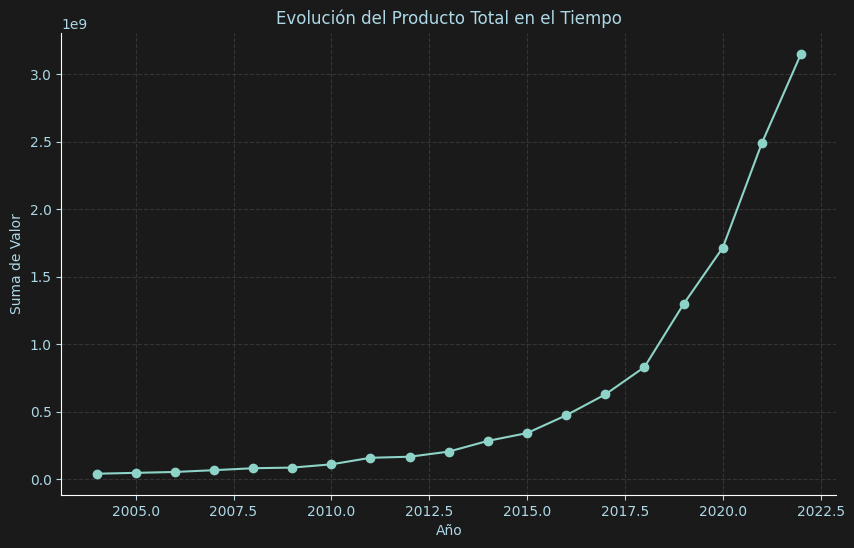

In [ ]:
# Ratificacmo los resultados con otro gráfico

# --- Paso 2: Calcular la suma de 'valor' por 'anio' ---
suma_por_anio = df.groupby('anio')['valor'].sum().reset_index()

# El resultado 'suma_por_anio' ahora es un DataFrame con dos columnas: 'anio' y 'valor' (que es la suma)

# --- Paso 3: Crear el gráfico de líneas ---
plt.figure(figsize=(10, 6)) # Opcional: Ajusta el tamaño del gráfico para mejor visualización

plt.plot(suma_por_anio['anio'], suma_por_anio['valor'], marker='o', linestyle='-')

# --- Paso 4: Personalizar el gráfico (similar a la sugerencia de Colab) ---
plt.title('Evolución del Producto Total en el Tiempo')
plt.xlabel('Año')
plt.ylabel('Suma de Valor')
plt.grid(True, linestyle='--', alpha=0.7) # Añadir una cuadrícula para facilitar la lectura

# Eliminar las espinas superior y derecha para una estética más limpia
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# **2. Difinimos el Periodo de Análisis desde 2013 hasta 2022: El gráfico muestra la evolución del valor del producto para diversas actividades económicas en un rango de diez años.**

>Identificación de Actividades con Mayor/Menor Valor:

> Mayor Valor del Producto: Las actividades de "Industria manufacturera", "Comercio mayorista, minorista y reparaciones", y "Actividades inmobiliarias, empresariales y de alquiler" consistentemente muestran los valores más altos, representados por colores más oscuros (rojo intenso) en el mapa de calor.

> Menor Valor del Producto: Actividades como "Pesca", "Hogares privados con servicio doméstico" y "Electricidad, gas y agua" parecen tener valores de producto significativamente menores, indicados por colores más claros (amarillo pálido).

> Tendencias a lo largo del tiempo (2013-2022):

> Crecimiento en el Tiempo: Se observa una tendencia general de aumento en el valor del producto para muchas actividades a medida que avanzan los años. Los colores tienden a ser más claros en 2013 y se vuelven más oscuros hacia 2021 y 2022 para varias categorías.

> Aceleración Reciente (2020-2022): Hay una clara intensificación de los colores (hacia el naranja y rojo) en los años más recientes, especialmente de 2020 a 2022. Esto sugiere un crecimiento más acelerado del valor del producto en la mayoría de las actividades durante este período, o al menos, que estas actividades alcanzaron sus picos de valor en estos años dentro del rango observado.

> Estabilidad o Menor Crecimiento en Algunas Áreas: Algunas actividades, como "Electricidad, gas y agua" o "Pesca", mantienen colores claros a lo largo de todo el período, lo que podría indicar un crecimiento más lento o una estabilidad en sus valores de producto en comparación con otras actividades.

>Variabilidad entre Sectores: El mapa de calor resalta la gran disparidad en la contribución al valor del producto entre las distintas actividades económicas. Mientras que algunos sectores son consistentemente "calientes" (altos valores), otros permanecen "fríos" (bajos valores).

C. Mapa de Calor

El año más reciente en los datos es: 2022
Datos filtrados desde el año: 2013
Filas en el DataFrame filtrado: 1248


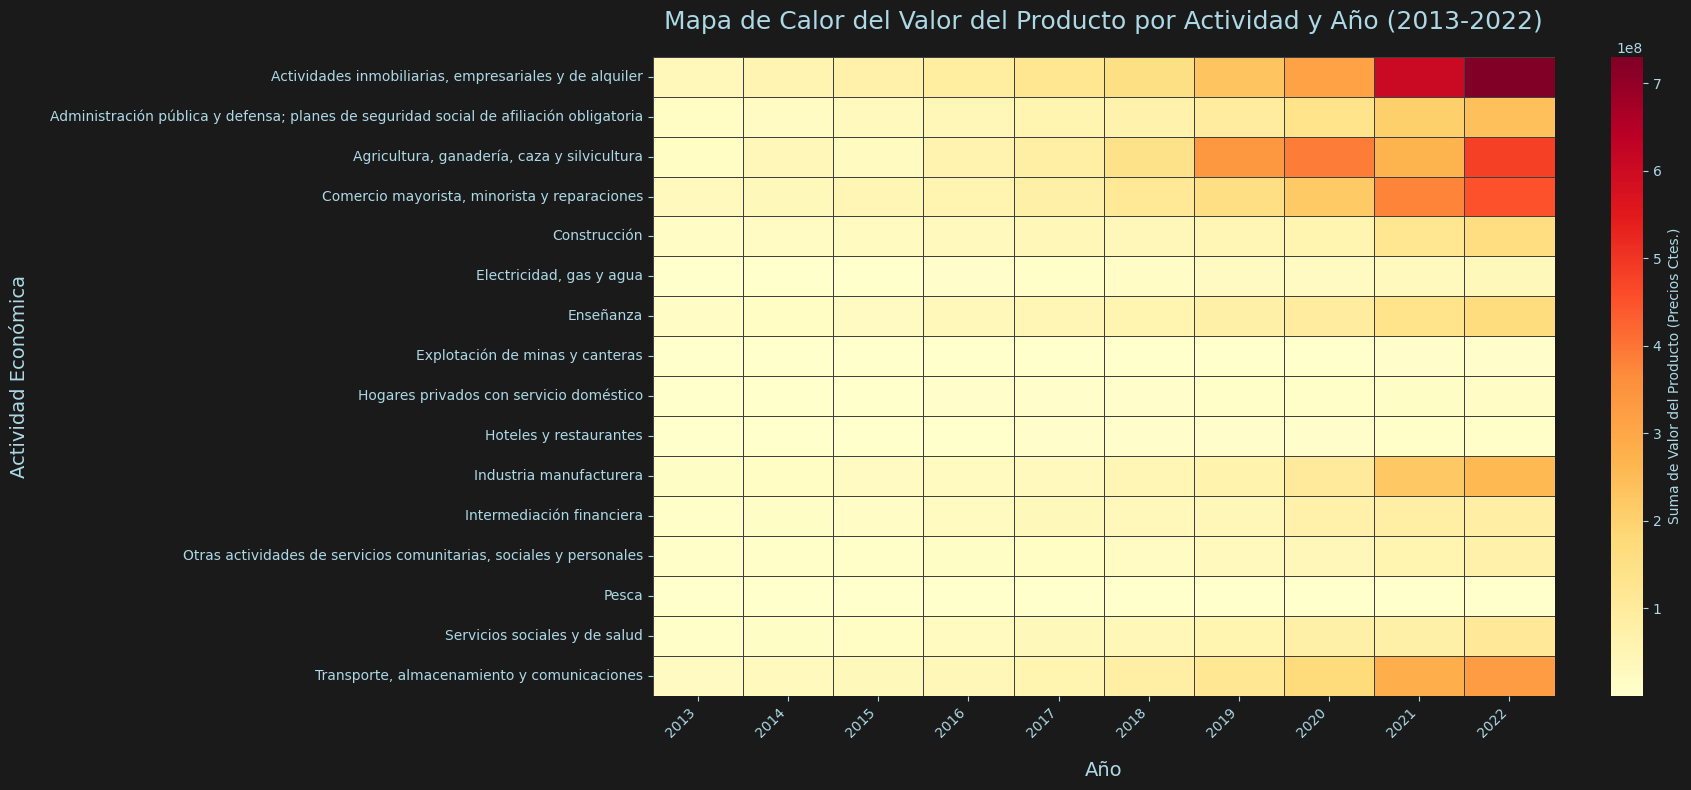

In [ ]:
# --- Paso 1: Filtrar los datos para los últimos 10 años ---
# Asegúrate de que 'anio' es numérico
df['anio'] = pd.to_numeric(df['anio'], errors='coerce')
df.dropna(subset=['anio'], inplace=True) # Elimina filas donde 'anio' no pudo ser convertido

anio_maximo = df['anio'].max()
print(f"El año más reciente en los datos es: {anio_maximo}")

anio_inicio_10_anios = anio_maximo - 9 # Para incluir el año máximo, contamos 10 años hacia atrás.

# Filtra el DataFrame
df_ultimos_10_anios = df[df['anio'] >= anio_inicio_10_anios].copy()

print(f"Datos filtrados desde el año: {anio_inicio_10_anios}")
print(f"Filas en el DataFrame filtrado: {len(df_ultimos_10_anios)}")

# --- Agrupar por actividad económica y año, y sumar los valores ---
#  'valor' es numérico antes de sumar
df_ultimos_10_anios['valor'] = pd.to_numeric(df_ultimos_10_anios['valor'], errors='coerce')
df_ultimos_10_anios.dropna(subset=['valor'], inplace=True) # Elimina filas donde 'valor' no pudo ser convertido


df_agrupado = df_ultimos_10_anios.groupby(['letra_desc', 'anio'])['valor'].sum().reset_index()

# --- Preparar los datos para el Heatmap (TODAS las actividades) ---
# df_agrupado ya contiene los nombres reales de tus actividades y sus sumas.
df_heatmap_all = df_agrupado.pivot_table(index='letra_desc', columns='anio', values='valor', aggfunc='sum')

# Rellenar cualquier valor NaN que pueda surgir del pivote con 0
df_heatmap_all = df_heatmap_all.fillna(0)


# --- Crear el gráfico de calor ---
plt.figure(figsize=(18, max(8, len(df_heatmap_all.index) * 0.4))) # Ajuste dinámico del alto

sns.heatmap(
    df_heatmap_all, # Este DataFrame ya usa los nombres de actividades de tu dataset
    cmap='YlOrRd', # Paleta de colores: Amarillo a Naranja a Rojo
    annot=False, # Si pones True, puede saturar el gráfico
    fmt=".0f",
    linewidths=.5,
    linecolor=plt.rcParams['grid.color'],
    cbar_kws={'label': 'Suma de Valor del Producto (Precios Ctes.)'}
)

# --- Títulos y etiquetas (se adaptarán a tus colores globales) ---
plt.title(f'Mapa de Calor del Valor del Producto por Actividad y Año ({anio_inicio_10_anios}-{anio_maximo})', fontsize=18, pad=20)
plt.xlabel('Año', fontsize=14, labelpad=15)
plt.ylabel('Actividad Económica', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


# **3. Evolución de las cinco actividades económicas más importantes durante el período 2013-2022:**

>Crecimiento Generalizado: Todas las actividades representadas en el gráfico muestran una tendencia de crecimiento en su "Suma de Precios Ctes." a lo largo del período. Esto sugiere una expansión económica pero debe también considerarse los efectos de la inflación del periódo en el aumento en los precios de los bienes y servicios de estos sectores.

>Liderazgo de "Actividades inmobiliarias, empresariales y de alquiler": Esta actividad (línea verde claro) es consistentemente la de mayor valor a lo largo de todo el período, y muestra un crecimiento muy pronunciado, especialmente a partir de 2017-2018, consolidando su posición como la más importante en términos de valor.

>Crecimiento Acelerado en los Últimos Años: Se observa una aceleración en el crecimiento de la mayoría de las actividades a partir de 2018-2019, con un incremento más marcado en los años finales del período (2020-2022). Esto podría reflejar una recuperación económica o un período de alta inflación que eleva los valores nominales coincidente con otro factor a muy importante considerar como la pandemia.

>Posición de "Agricultura, ganadería, caza y silvicultura": Esta actividad (línea amarilla) se mantiene como la segunda más importante en la mayor parte del período, aunque su crecimiento parece ser más volátil o menos lineal que el de las actividades inmobiliarias, con una caída notable alrededor de 2020 antes de recuperarse.

>Crecimiento Constante de "Comercio mayorista, minorista y reparaciones": Esta actividad (línea naranja) muestra un crecimiento constante y significativo, manteniéndose en el tercer o cuarto lugar de importancia a lo largo del tiempo.

>Crecimiento de "Transporte, almacenamiento y comunicaciones" y "Administración pública y defensa": Ambas actividades (líneas rosa y azul claro, respectivamente) también crecen de manera constante, aunque con valores absolutos menores en comparación con las tres primeras.

*A pesar del notable incremento de la 'Industria manufacturera' observado en los últimos 3 años (según se apreciaba en el gráfico de calor), al extender el análisis al período selelccionado, esta actividad no logra ubicarse entre las 5 principales. Es importante destacar que esta conclusión podría cambiar si se ajustara el lapso de tiempo considerado o si se dispusiera de datos actualizados

C. Lineplot (Gráfico de líneas)

El año más reciente en los datos es: 2022
Datos filtrados desde el año: 2013
Filas en el DataFrame filtrado: 1248

Las 5 actividades económicas más importantes (últimos 10 años):
['Actividades inmobiliarias, empresariales y de alquiler', 'Agricultura, ganadería, caza y silvicultura', 'Comercio mayorista, minorista y reparaciones', 'Transporte, almacenamiento y comunicaciones', 'Administración pública y defensa; planes de seguridad social de afiliación obligatoria']


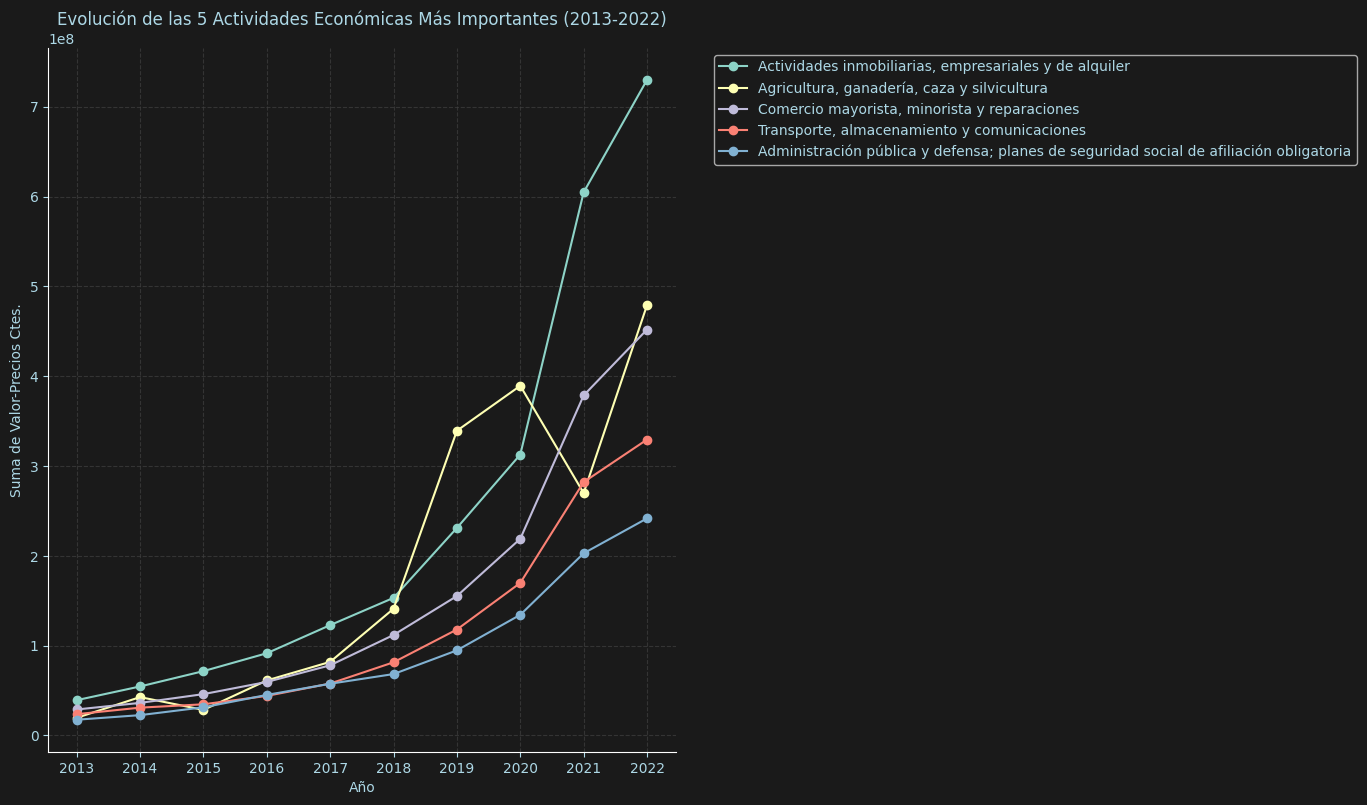

In [ ]:
# --- Paso 1: Filtrar los datos para los últimos 10 años ---

anio_maximo = df['anio'].max()
print(f"El año más reciente en los datos es: {anio_maximo}")

# Calcula el año de inicio para los últimos 10 años
anio_inicio_10_anios = anio_maximo - 9 # Para incluir el año máximo, contamos 10 años hacia atrás.

# Filtra el DataFrame
df_ultimos_10_anios = df[df['anio'] >= anio_inicio_10_anios].copy()

print(f"Datos filtrados desde el año: {anio_inicio_10_anios}")
print(f"Filas en el DataFrame filtrado: {len(df_ultimos_10_anios)}")

# --- Paso 2 y 3: Agrupar, sumar e identificar las 5 actividades más importantes ---
# Agrupamos por actividad económica y año, y sumamos los valores
df_agrupado = df_ultimos_10_anios.groupby(['letra_desc', 'anio'])['valor'].sum().reset_index()

# Para encontrar las 5 actividades más importantes en general en este período,
# sumamos los valores por actividad económica en todo el período de 10 años
top_5_actividades = df_agrupado.groupby('letra_desc')['valor'].sum().nlargest(5).index
print("\nLas 5 actividades económicas más importantes (últimos 10 años):")
print(top_5_actividades.tolist())

# Filtramos el DataFrame agrupado para incluir solo estas 5 actividades principales
df_top_5 = df_agrupado[df_agrupado['letra_desc'].isin(top_5_actividades)]

# --- Paso 4: Visualizar la evolución de las 5 actividades principales ---
plt.figure(figsize=(14, 8)) # Ajusta el tamaño para una mejor visualización

# Graficar cada una de las 5 actividades principales
for actividad in top_5_actividades:
    df_actividad = df_top_5[df_top_5['letra_desc'] == actividad]
    plt.plot(df_actividad['anio'], df_actividad['valor'], marker='o', label=actividad)

plt.title(f'Evolución de las 5 Actividades Económicas Más Importantes ({anio_inicio_10_anios}-{anio_maximo})')
plt.xlabel('Año')
plt.ylabel('Suma de Valor-Precios Ctes.')
plt.xticks(df_top_5['anio'].unique()) # Asegura que todos los años estén en el eje X
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mover la leyenda fuera del gráfico
plt.tight_layout() # Ajustar el diseño para que la leyenda no se superponga

# Eliminar las espinas superior y derecha para una estética más limpia
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# **3. Conclusiones Generales sobre la Dinámica:**

>Estabilidad en las Proporciones Relativas: A primera vista, el gráfico sugiere que las proporciones relativas de estas 5 actividades principales entre sí han sido bastante estables a lo largo del período 2013-2022. No se observa una actividad que haya "quitado" una porción sustancial del "pastel" a las otras de manera sostenida, ni que una haya desaparecido o surgido de forma dominante dentro de este grupo.

>Dominio Persistente: "Actividades inmobiliarias, empresariales y de alquiler" mantiene su posición como la actividad de mayor peso relativo entre las 5, lo cual es coherente con tu comentario sobre su "mayor crecimiento individual" (aunque aquí solo vemos la proporción).

>Importancia Continua: Las 5 actividades seleccionadas han mantenido su relevancia como las principales en términos de participación porcentual, con una jerarquía bastante consistente.

>Fluctuaciones Anuales: Se observan fluctuaciones menores año a año en las proporciones, lo cual es normal y podría estar influenciado por ciclos económicos, políticas o eventos específicos.

>En resumen, aunque puede haber crecimientos individuales en valor absoluto, la estructura de la participación relativa entre estas 5 actividades económicas principales se ha mantenido relativamente constante y dominada por "Actividades inmobiliarias, empresariales y de alquiler" durante el período 2013-2022. Esto refuerza la idea de que estas son las columnas vertebrales de la economía analizada, con una distribución de peso relativa que no ha experimentado grandes transformaciones en el lapso de tiempo mostrado.

D.Stackplot

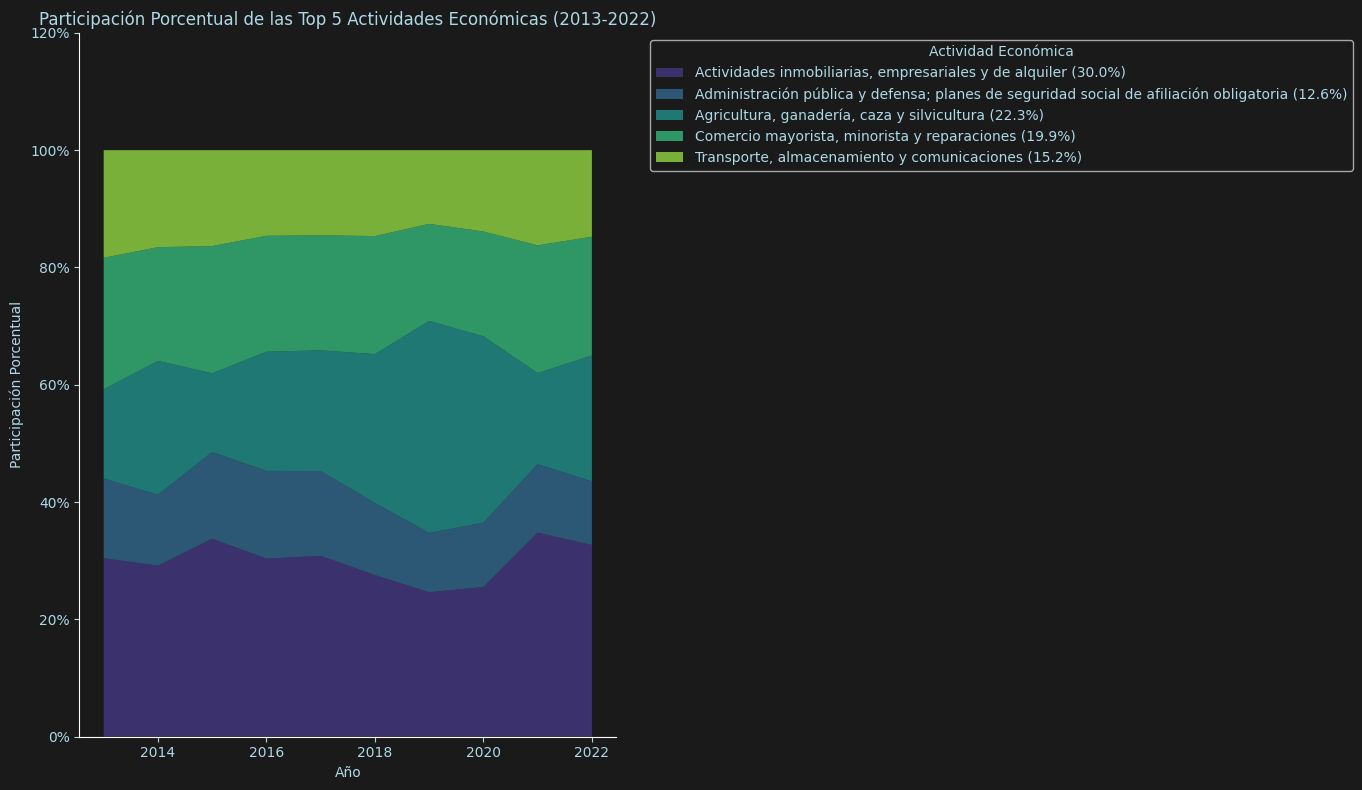

In [ ]:
# 1. Pivotar el DataFrame para tener años como índice y actividades como columnas
df_pivot_porcentaje = df_top_5.pivot_table(index='anio', columns='letra_desc', values='valor', aggfunc='sum')

# 2. Calcular el porcentaje de cada actividad sobre el total en cada año
df_porcentaje = df_pivot_porcentaje.apply(lambda x: x / x.sum(), axis=1)

# --- Novedad: Calcular el porcentaje promedio o el porcentaje del último año para la leyenda ---
porcentajes_leyenda = df_porcentaje.mean() * 100 # Multiplicar por 100 para tener el valor directo del %

new_labels = []
for actividad in df_porcentaje.columns:
    porcentaje = porcentajes_leyenda.get(actividad, 0) # Obtiene el porcentaje, 0 si no encuentra
    new_labels.append(f"{actividad} ({porcentaje:.1f}%)") # Formatear a 1 decimal

# 3. Graficar el área apilada de porcentajes
plt.figure(figsize=(14, 8))

colores = sns.color_palette("viridis", n_colors=len(df_porcentaje.columns))

plt.stackplot(df_porcentaje.index,
              [df_porcentaje[col] for col in df_porcentaje.columns],
              labels=new_labels,
              colors=colores,
              alpha=0.8)

plt.title(f'Participación Porcentual de las Top 5 Actividades Económicas (2013-2022)') # Ajusta los años si cambian
plt.xlabel('Año')
plt.ylabel('Participación Porcentual')
plt.yticks(plt.gca().get_yticks(), ['{:,.0%}'.format(x) for x in plt.gca().get_yticks()]) # Formato a porcentaje

# Asegura que los años en el eje X sean enteros
from matplotlib.ticker import MaxNLocator # Importamos MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Usamos MaxNLocator con el parámetro integer=True

plt.legend(title='Actividad Económica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Eliminar las espinas superior y derecha
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# **4 . El Diagrama de Violín ofrece una visión de la distabilidad y concentración de los valores de cada actividad:**
> El gráfico de violín revela que las "Actividades inmobiliarias, empresariales y de alquiler" muestran la mayor variabilidad y dispersión en sus valores, alcanzando los rangos más altos, lo que sugiere una gran volatilidad o heterogeneidad en sus registros.
> En contraste, actividades como la "Administración pública y defensa..." presentan una distribución de valores mucho más concentrada y con menor variabilidad, indicando un comportamiento más estable o predecible en sus mediciones.
> El resto de las actividades se sitúan en un rango intermedio de dispersión, aunque con la "Agricultura, ganadería, caza y silvicultura" y el "Comercio mayorista, minorista y reparaciones" mostrando también una presencia considerable de valores elevados y una distribución relativamente amplia.


E.Violinplot

/tmp/ipython-input-23-938195780.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-23-938195780.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ajusta el diseño para que todo quepa


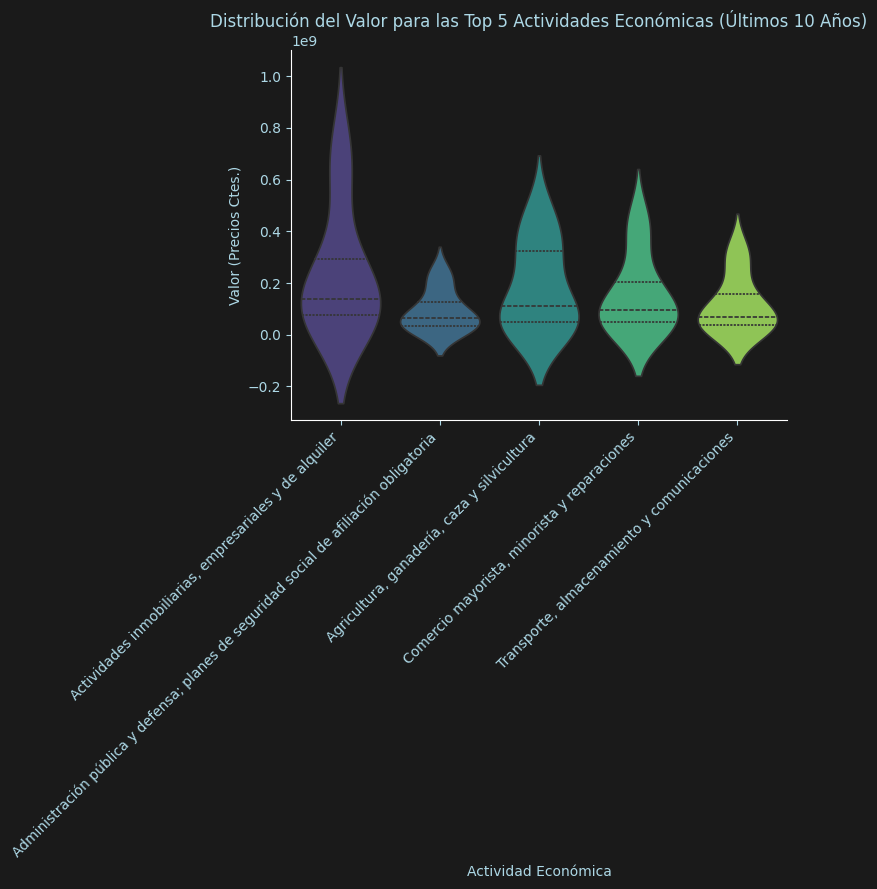

In [ ]:
sns.violinplot(
    x='letra_desc',  # Categorías en el eje X (tus actividades económicas)
    y='valor',  # Valores numéricos en el eje Y
    data=df_top_5,  # Tu DataFrame filtrado
    inner='quartile',  # Muestra la mediana y los cuartiles dentro de cada violín
    palette='viridis'  # Paleta de colores para los violines
)

plt.title(
    'Distribución del Valor para las Top 5 Actividades Económicas (Últimos 10 Años)'
)
plt.xlabel('Actividad Económica')
plt.ylabel('Valor (Precios Ctes.)')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje X
plt.tight_layout()  # Ajusta el diseño para que todo quepa

# Eliminar las espinas superior y derecha para una estética más limpia
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# **5. Componentes clave del Box Plot y su significado:**

Línea central dentro de la caja: Representa la mediana (o el 50 percentil) de los valores de la actividad. Es el punto donde el 50% de los datos están por debajo y el 50% por encima.
La "Caja" (Rectángulo): Delimita el rango intercuartílico (IQR), que es el espacio entre el primer cuartil (Q1 - 25% de los datos por debajo) y el tercer cuartil (Q3 - 75% de los datos por debajo). Esta caja contiene el 50% central de todos los datos de la actividad. Una caja más corta indica que la mitad central de los datos está más concentrada; una caja más larga indica mayor dispersión.
Los "Bigotes" (Líneas que se extienden desde la caja): Muestran el rango de datos que no se consideran atípicos. Generalmente, se extienden hasta 1.5×IQR desde Q1 y Q3. La longitud de los bigotes te da una idea de la dispersión de los datos fuera del 50% central.
Puntos individuales fuera de los bigotes: Estos son los valores atípicos (outliers). Son puntos de datos que se encuentran significativamente lejos de la mayoría de los demás valores de la distribución, más allá del rango definido por los bigotes. Su presencia puede indicar eventos inusuales, errores de medición o simplemente valores extremos legítimos.

Al observar el gráfico:

>Actividades inmobiliarias, empresariales y de alquiler (recuadro morado): Muestra una mediana relativamente alta y una caja bastante extendida hacia arriba. Esto indica que no solo su valor central es elevado, sino que también tiene una considerable variabilidad en sus valores dentro del 50% central.
La presencia de puntos atípicos por encima del bigote superior es notable. Esto sugiere que ha habido trimestres o años con valores excepcionalmente altos en esta actividad, lo cual es coherente con la línea de crecimiento pronunciada que vimos en el gráfico de líneas. Estos outliers son probablemente los que "estiran" la parte superior de su distribución en el violin plot(Situación del mercado-Crisis Económocas-Devaluación).

>Administración pública y defensa; planes de seguridad social de afiliación obligatoria (recuadro azul): Su mediana es más baja que la inmobiliaria y su caja parece más compacta. Esto sugiere menos variabilidad en sus valores y una concentración de datos en un rango más estrecho. La ausencia aparente de outliers en la parte superior indica un comportamiento de valor más predecible o estable.

>Agricultura, ganadería, caza y silvicultura (recuadro verde claro):Su mediana es de las más bajas, pero su caja es relativamente extensa, lo que sugiere una variabilidad considerable en el 50% central de sus valores. Aunque sus valores se concentran en un rango inferior en general, la dispersión dentro de su núcleo es notable.

>Comercio mayorista, minorista y reparaciones (recuadro verde azulado): Similar a la agricultura en términos de medianas y Q3, pero su caja es un poco más extendida, sugiriendo una variabilidad moderada. Los outliers, no son tan extremos o numerosos como en inmobiliaria.

>Transporte, almacenamiento y comunicaciones (recuadro verde):Presenta una mediana más baja y una caja de tamaño moderado. La dispersión es evidente, y al igual que la actividad inmobiliaria, podría tener outliers en la parte superior, lo que contribuiría a su "forma estirada" en el violin plot anterior.

F.boxplot

/tmp/ipython-input-34-1040405354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-34-1040405354.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


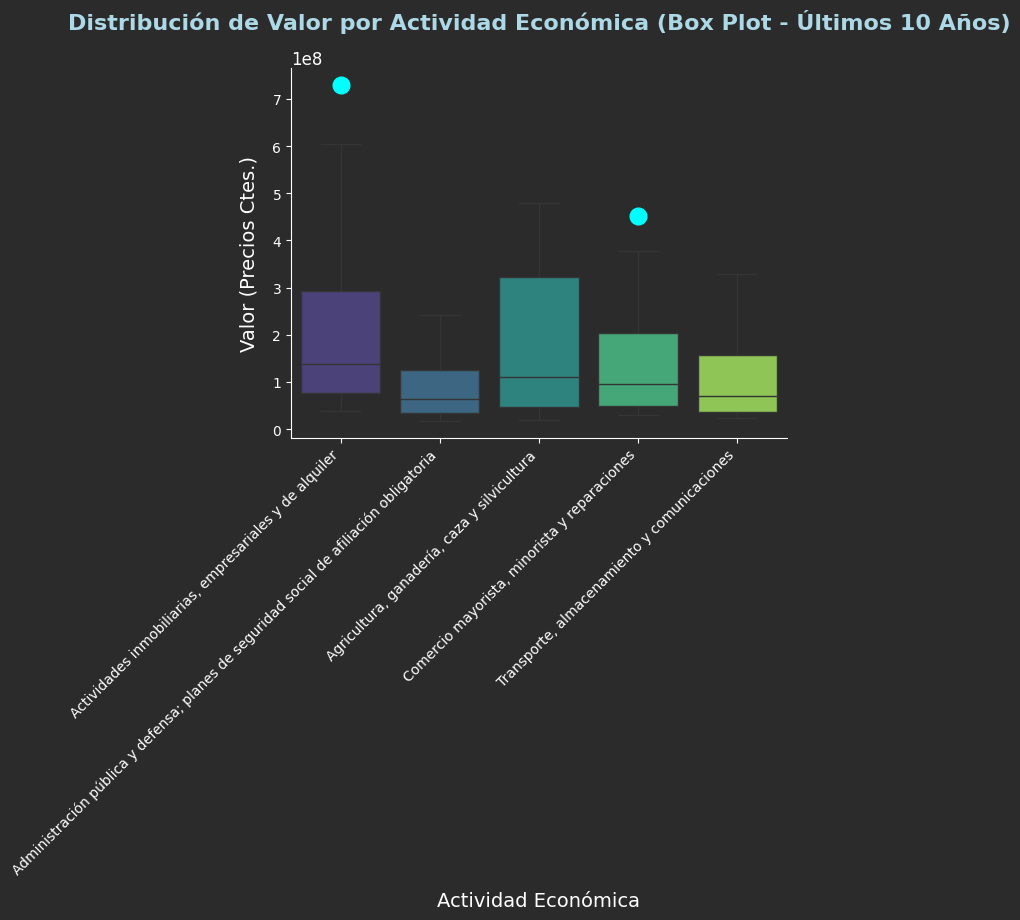

In [ ]:
flierprops = dict(marker='o', markerfacecolor='cyan', markersize=12,
                  linestyle='none', markeredgecolor='cyan') # Borde también cian para consistencia

sns.boxplot(
    x='letra_desc',        # Categorías en el eje X ( actividades económicas)
    y='valor',             # Valores numéricos en el eje Y
    data=df_top_5,         # Tu DataFrame filtrado
    palette='viridis',     # Paleta de colores para las cajas
    showfliers=True,       # Asegura que se muestren los outliers
    flierprops=flierprops  # Aplica las propiedades de estilo definidas para los outliers
)

plt.title('Distribución de Valor por Actividad Económica (Box Plot - Últimos 10 Años)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Actividad Económica', fontsize=14, labelpad=10)
plt.ylabel('Valor (Precios Ctes.)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Eliminar las espinas superior y derecha para una estética más limpia
plt.gca().spines[['top', 'right']].set_visible(False)
# Asegurar que las espinas izquierda y bottom estén visibles y sean blancas
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

plt.show()

# Conclusiones Generales e Implicaciones
---

El Análisis Exploratorio de Datos ha revelado información crucial sobre la estructura y dinámica de las principales actividades económicas en el Chaco durante el período 2004-2022.

**Hallazgos Clave:**

* **Dominio y Estabilidad de las Principales Actividades:** El gráfico de áreas apiladas mostró que, si bien la "Industria manufacturera" tuvo un incremento significativo en los últimos 3 años, al extender el análisis a todo el período, esta actividad no se posiciona entre las 5 principales en la suma total. Las "Actividades inmobiliarias, empresariales y de alquiler", junto con la "Agricultura, ganadería, caza y silvicultura" y el "Comercio mayorista, minorista y reparaciones", mantuvieron una participación porcentual relativamente estable y dominante dentro del conjunto de las 5 principales. Esto sugiere una estructura económica con pilares persistentes en términos de peso relativo.

* **Heterogeneidad en la Volatilidad de los Sectores:** Los diagramas de violín y box plots destacaron una marcada diferencia en la distribución y dispersión de los valores entre las actividades. Las "Actividades inmobiliarias, empresariales y de alquiler" muestran la mayor variabilidad, alcanzando los rangos más altos y presentando numerosos valores atípicos (outliers) que indican eventos de valores excepcionalmente elevados. Esto sugiere una mayor volatilidad en este sector. Por otro lado, la "Administración pública y defensa..." exhibe una distribución de valores mucho más concentrada y con menor variabilidad, implicando un comportamiento más predecible. La "Agricultura, ganadería, caza y silvicultura", aunque con una mediana más baja, presenta una caja relativamente extensa en el box plot, indicando una dispersión considerable dentro de su 50% central, pero sin outliers visibles que la empujen a valores extremos en este período.

* **Relaciones de Correlación:** Aunque no se pudo visualizar directamente en un gráfico específico de este análisis, es importante recordar que la correlación entre variables económicas es fundamental para comprender la interdependencia de los sectores.

**Implicaciones y Próximos Pasos:**

* La identificación de sectores con alta variabilidad y outliers (como las actividades inmobiliarias) invita a una investigación más profunda sobre los factores externos (ej. situaciones de mercado, crisis económicas, devaluación) que pudieron haber influido en esos picos de valor.
* La estabilidad de algunos sectores (como la administración pública) puede ser un indicador de resiliencia ante fluctuaciones, mientras que la variabilidad en otros (como la agricultura, a pesar de la ausencia de outliers extremos) sugiere la necesidad de estrategias adaptativas.
* Futuros análisis podrían incluir el estudio de la causalidad entre estos sectores, el impacto de políticas públicas específicas o la comparación con otras regiones para obtener una perspectiva más amplia.

En definitiva, este EDA proporciona una base sólida para entender el panorama económico del Chaco y guía la formulación de preguntas de investigación más específicas.